# 09. 동적 회귀 모델

**이전 두 장에서의 시계열 모델에는 시계열의 이전 관측값으로부터 얻은 정보는 들어가지만 관련 있을 수 있는 다른 정보가 들어가지는 않습니다.** 예를 들면, 휴일 효과, 경쟁자 활동, 관련 법 변경, 시장 확대, 또는 몇몇 과거 변동을 설명할 수 있는 다른 외부 변수가 더 정확한 예측값으로 이어질 수 있습니다. 

반면에, 5 장의 회귀 모델은 예측변수(predictor variable)의 수많은 관련 정보를 포함하도록 합니다만, ARIMA 모델로 다룰 수 있는 미묘한 시계열 동역학을 다루긴 힘듭니다. 이 장에서는 모델에 넣을 다른 정보를 넣기 위해 ARIMA 모델을 어떻게 확장할지 다루겠습니다.

5 장에서 다음과 같은 형태의 회귀 모델을 다루었습니다.

$$y_t = \beta_0 + \beta_1 x_{1,t} + \dots + \beta_k x_{k,t} + e_t,$$

여기에서  $y_t$는  $k$ 예측변수(predictor variable) $(x_{1,t},\dots,x_{k,t})$의 선형 함수이고, $ε_t$는 보통 상관관계가 없는 오차항으로 가정합니다(즉, 백색잡음(white noise)). 결과 잔차에 유의미한 상관관계가 있는지 판단하기 위해 브로이쉬-갓프레이(Breusch-Godfrey) 검정 같은 통계 검정을 고려하였습니다.

**이 장에서는, 자기상관을 넣기 위해 회귀에 오차항을 넣을 것입니다. 이러한 큰 변화를 강조하기 위해, 식에서 $\epsilon_k$를 $\eta_t$로 바꿀 것입니다. 오차 시계열 $\eta_t$는 ARIMA 모델을 따른다고 가정합니다. 예를 들어, $\eta_t$가 ARIMA(1,1,1) 모델을 따르면, 다음과 같이 쓸 수 있습니다.**

$$\begin{align*}
  y_t &= \beta_0 + \beta_1 x_{1,t} + \dots + \beta_k x_{k,t} + n_t,\\
      & (1-\phi_1B)(1-B)n_t = (1+\theta_1B)e_t,
\end{align*}$$

여기에서  $ε_t$는 백색잡음 시계열입니다.

모델에 두 오차항,  $η_t$로 쓰는 회귀 모델로부터 온 오차,  $ε_t$로 쓰는 ARIMA 모델로부터 온 오차가 있는 것에 주목하시길 바랍니다. ARIMA 모델 오차만 백색잡음으로 가정합니다.

<br>

## 09.01. 추정

모델에서 매개변수를 추정할 때, $ε_t$값을 제곱한 것의 합을 최소화할 필요가 있습니다. $ε_t$값 대신에 $η_t$값을 제곱한 것의 합을 최소화하면(오차에 있는 자기상관을 무시하는 회귀 모델을 추정할 때 일어날 수 있는), 몇 가지 문제가 생깁니다.

1. **몇 가지 정보가 계산에서 무시되기 때문에, 추정된 계수 $\hat{\beta}_0,\dots,\hat{\beta}_k$이 더이상 가장 좋은 추정값이 아닙니다.**
2. **모델과 관련된 어떠한 통계 검정이(즉, 계수에 대한 t-검정) 부정확해질 것입니다.**
3. **적합 모델(fitted model)의 AICc 값이 더이상 가장 좋은 예측 모델을 판단하는 좋은 안내자가 되지 않습니다.**
4. **부분의 경우에서, 계수와 관련된  p-값이 너무 작을 것이고, 몇몇 예측변수(predictor variable)가 실제로는 그렇지 않지만 중요한 것처럼 나타날 것입니다. 이것은 “허위 회귀(spurious regression)”라고 알려져 있습니다.**

$ε_t$값을 제곱한 것의 합을 최소화하는 것으로 이러한 문제를 방지합니다. 대신에, 최대 가능도 추정(MLE)을 사용할 수 있습니다. 이 방법은 비슷한 계수 추정값을 낼 것입니다.

**ARMA 오차를 가지고 회귀를 추정할 때 중요하게 생각해야하는 것은 다음과 같습니다.**

**모델의 모든 변수는 먼저 정상성(stationarity)을 나타내야합니다.** 따라서, 먼저  $y_t$와 모든 예측변수(predictor variable) $(x_{1,t},\dots,x_{k,t})$가 정상성(stationarity)을 나타내는지 살펴보아야 합니다. 이러한 것 중에서 하나라도 정상성을 나타내지 않을 때 모델을 추정하면, 추정된 계수가 일관적이지 않을 것입니다(따라서 의미가 없을 수도 있습니다). 정상성을 나타내지 않는 변수가 서로 결합되어있는 경우는 예외가 됩니다. 정상성을 나타내지 않는  $y_t$와 예측변수(predictor variable)의 선형 결합이 정상성을 나타낼 때, 추정된 계수가 일관적일 것입니다.

**따라서 모델에서 정상성을 나타내지 않는 변수의 1차 차분을 구합니다.** 종종 $y_t$와 예측변수(predictor variable)의 관계식을 유지할 가치가 있습니다. 결과적으로 이러한 것 중에서 차분을 구할 필요가 있을 때, 모든 변수의 차분을 구하는 일이 흔합니다. 그래서 결과 모델을 차분 계산 없이 원본 데이터를 사용할 때 얻는 “수준값의 모델(model in levels)”과 구별하여 “차분값의 모델(model in differences)”이라고 부릅니다.

**모델의 모든 변수가 정상성(stationarity)을 나타내면, 잔차(residual)에 대한 ARMA 오차만을 고려할 필요가 있습니다. ARIMA 오차를 고려하는 회귀 모델은 ARMA 오차를 고려하는 차분값의 회귀 모델과 같습니다. 예를 들어, ARIMA(1,1,1) 오차를 고려하는 위의 회귀 모델을 차분하면, 다음과 같은 모델을 얻습니다.**

$$\begin{align*}
  y'_t &= \beta_1 x'_{1,t} + \dots + \beta_k x'_{k,t} + \eta'_t,\\
       & (1-\phi_1B)\eta'_t = (1+\theta_1B)\varepsilon_t,
\end{align*}$$

여기에서 $y'_t=y_t-y_{t-1}, x'_{t,i}=x_{t,i}-x_{t-1,i}$이고 $\eta'_t=\eta_t-\eta_{t-1}$ 입니다. 이는 ARMA 오차를 고려하는 차분값의 회귀 모델입니다.



<br>

## 09.02. R에서 ARIMA 오차를 고려하는 회귀

**R 함수 `Arima()`에서 `xreg` 입력값을 사용하면 ARIMA 오차를 고려하여 회귀 모델을 맞춥니다. `order` 입력값으로 ARIMA 오차 모델의 차수를 정합니다. 차분을 정하면, 모델을 추정하기 전에 회귀 모델의 모든 변수에 대한 차분 계산을 수해합니다.** 예를 들어, 다음과 같은 R 명령어는

```R
fit <- Arima(y, xreg=x, order=c(1,1,0))
```

모델 $y_t' = \beta_1 x'_t + \eta'_t$을 맞춥니다. 여기에서 $\eta'_t = \phi_1 \eta'_{t-1} + \varepsilon_t$는 AR(1) 오차입니다. 이것은 다음과 같은 모델

$$y_t = \beta_0 + \beta_1 x_t + \eta_t,$$

과 같습니다. 여기에서 $\eta_t$는 ARIMA(1,1,0) 오차입니다. 상수항이 차분 때문에 사라진다는 것에 주목하시길 바랍니다. 차분을 계산한 모델에서 상수를 넣기 위해서는 `include.drift=TRUE`라고 둡니다.

`auto.arima()` 함수도 `xreg` 입력값으로 회귀 항을 다룹니다. 사용하는 사람이 넣을 예측변수(predictor variable)를 반드시 정해야합니다만, `auto.arima()`는 오차에 대한 가장 좋은 ARIMA 모델을 고릅니다. 차분 계산이 필요한 경우에는, 최종 모델이 원래의 변수에 대한 식으로 표현될 것이지만, 추정 과정에서는 모든 변수에 대해 차분 계산을 수행합니다.

최종 모델에 대한 AICc를 계산하고, 이 값을 가장 좋은 예측변수(predictor variable)를 결정하는데 사용할 수 있습니다. 즉, 이 과정을 다룰 예측변수(predictor variable)의 모든 부분집합에 대해 반복해야만 하고, 최종적으로 AICc 값이 가장 낮은 모델이 선택될 것입니다.

<br>

### 예제: 미국 개인 소득과 소비

그림은 1970년부터 2016년 3분기까지 분기별 개인 소비 지출과 개인 가처분 소득의 변화를 나타냅니다. 소득의 변화에 따라 지출의 변화를 예측하려고 합니다. 소득의 변화는 곧바로 지출의 변화로 이어질 필요는 없습니다(즉, 직장을 잃은 경우, 새로운 상황에 적응하여 지출을 몇 달 동안 줄일 수도 있습니다). 하지만, 이 예제에서는 이렇게 복잡한 상황을 무시할 것이고 소득의 평균적인 변화의 효과가 소비 지출의 평균적인 변화에 곧바로 영향을 미치는 것을 측정하려고 합니다.

In [6]:
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)

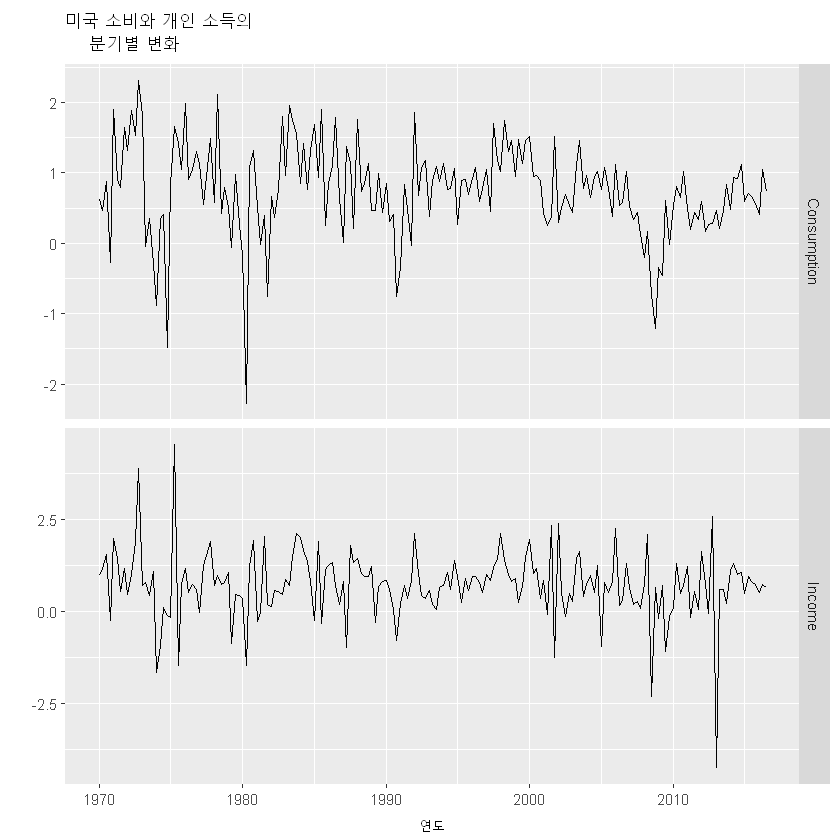

In [5]:
autoplot(uschange[,1:2], facets=TRUE) +
  xlab("연도") + ylab("") +
  ggtitle("미국 소비와 개인 소득의
    분기별 변화")

In [7]:
(fit <- auto.arima(uschange[,"Consumption"],
  xreg=uschange[,"Income"]))

Series: uschange[, "Consumption"] 
Regression with ARIMA(1,0,2) errors 

Coefficients:
         ar1      ma1     ma2  intercept    xreg
      0.6922  -0.5758  0.1984     0.5990  0.2028
s.e.  0.1159   0.1301  0.0756     0.0884  0.0461

sigma^2 = 0.3219:  log likelihood = -156.95
AIC=325.91   AICc=326.37   BIC=345.29

데이터에 이미 분명하게 정상성(stationarity)이 나타납니다(원래의 수입과 지출 대신에 백분율 변화를 다루고 있기 때문에), 따라서 어떠한 차분값(difference)도 구할 필요가 없습니다. 맞춘 모델은 다음과 같습니다.

$$\begin{align*}
  y_t &= 0.599 +
         0.203 x_t + \eta_t, \\
  \eta_t &= 0.692 \eta_{t-1} + \varepsilon_t
        -0.576 \varepsilon_{t-1} +
        0.198 \varepsilon_{t-2},\\
  \varepsilon_t &\sim \text{NID}(0,0.322).
\end{align*}$$

`residuals()`함수로  $η_t$와 $ε_t$시계열 둘 다를 되돌릴 수 있습니다.

* 적합 모델에서 얻은 회귀 오차 $( 
η_t
 )$와 ARIMA 오차 $( 
ε_t
 )$.

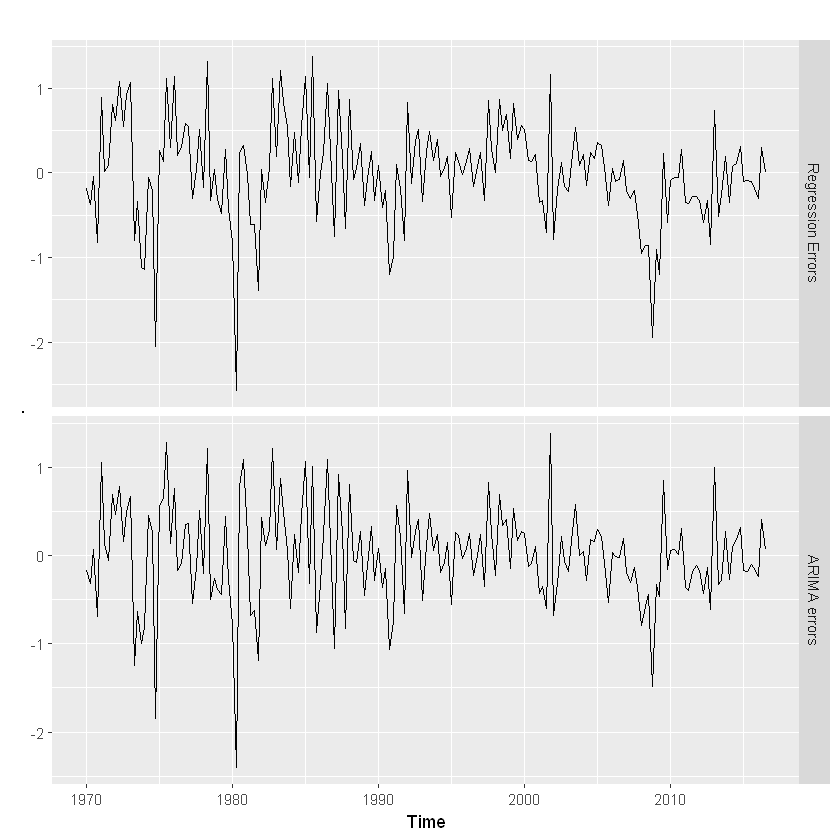

In [8]:
cbind("Regression Errors" = residuals(fit, type="regression"),
      "ARIMA errors" = residuals(fit, type="innovation")) %>%
  autoplot(facets=TRUE)

이것은 백색잡음(white noise) 시계열과 비슷해야 하는 ARIMA 오차입니다.



* 잔차(즉, ARIMA 오차)가 백색잡음과 크게 다르지 않습니다


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,2) errors
Q* = 5.8916, df = 5, p-value = 0.3169

Model df: 3.   Total lags used: 8



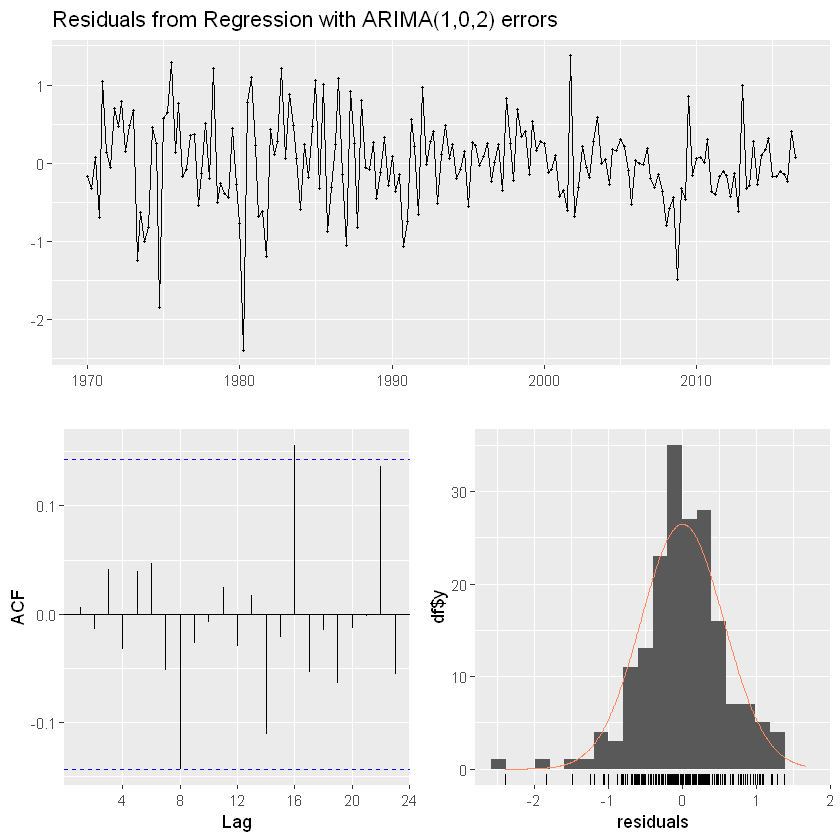

In [9]:
checkresiduals(fit)

<br>

## 09.03. 예측하기

ARIMA 오차를 고려하는 회귀 모델을 사용하여 예측하려면, 모델의 ARIMA 부분과 모델의 회귀 부분을 예측해야 하고, 결과를 합쳐야 합니다. 보통의 회귀 모델처럼, 예측값을 얻기 위해, 예측변수(predictor variable)를 먼저 예측해야 합니다. 예측변수(predictor variable)가 미래에 어떻게 될 지 아는 경우는 (예를 들면, 시간, 요일 등 달력과 관련 있는 변수), 비교적 간단합니다. 하지만, 예측변수(predictor variable)가 알려지지 않은 경우에는, 각각을 따로 모델링해야 하거나, 각 예측변수(predictor variable)에 대한 가상의 미래 값을 사용해야 합니다.

<br>

### 9.3.1 예제: 미국 개인 소비와 소득

개인 가처분 소득(personal disposable income)의 미래 백분율 변화가 이전 40년 백분율 값의 평균과 같을 것이라고 가정하고, 다음 8개의 분기에 대해 예측값을 계산해보겠습니다.

* ARIMA(1,0,2) 오차 모델을 고려하여, 가처분 소득의 백분율 변화에 대한 소비 지출의 백분율 변화를 회귀하여 얻은 예측값.

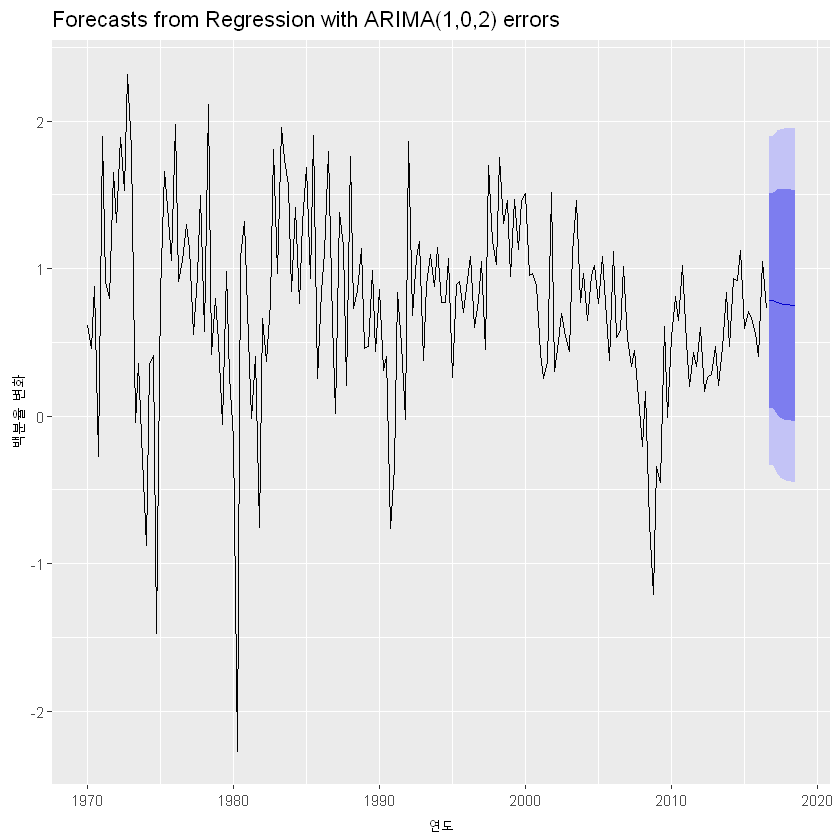

In [10]:
fcast <- forecast(fit, xreg=rep(mean(uschange[,2]),8))

autoplot(fcast) + xlab("연도") +
  ylab("백분율 변화")

이제 소득 예측변수(predictor variable)를 가지고 데이터의 몇 가지 변형을 설명할 수 있기 때문에 이 모델의 예측구간(prediction interval)은 8.5 절에서 만든 모델에서 나타나는 것보다 좁게 나타납니다.

회귀 모델로부터(ARIMA 오차를 고려한 모델이나 그렇지 않은 것이나) 얻은 예측 구간은 예측변수(predictor variable)의 예측값의 불확실성을 계산에 넣지 않는다는 것을 알아차리는 것이 중요합니다. 따라서 예측변수(predictor variable)의 가정한(또는 추정한) 미래 값을 가정하는 조건에서 이러한 예측구간을 해석해야합니다.

<br>

### 예제: 전기 수요 예측

일별 전기 수요는 기온의 함수로 모델링 할 수 있습니다. 전력 사용량 고지서에서 볼 수 있는 것처럼, 더운 날에는 냉방 때문에, 추운 날에는 난방 때문에 전기를 더 사용합니다. 덥거나 추운 날에 수요가 더 높아지는 것이 그림의 U자 모양에 반영되어 나타납니다. 여기에서 일별 수요는 일별 최대 기온과 함께 나타냈습니다.

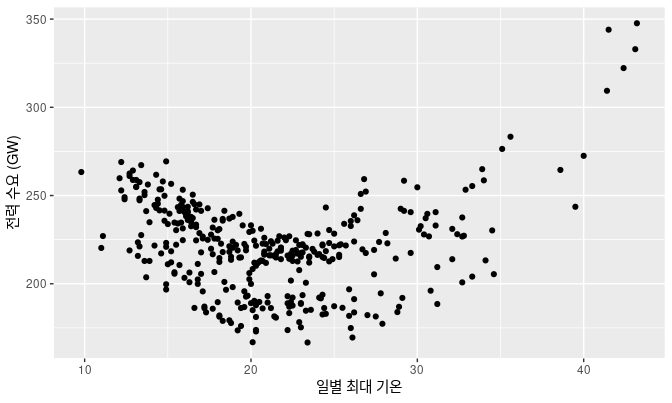

`elecdaily`에는 일별 전체 수요값, 근무일을 가리키는 표시자 변수(indicator variable; 여기에서 근무일은 1, 근무일이 아니면 0으로 저장되어있습니다), 일별 최고 기온 등의 데이터가 있습니다. 그림 9.6은 일별 수요와 일별 최고 기온의 시계열을 나타냅니다. 주 단위의 계절성이 있기 때문에, 해당 주기를 7로 두었습니다. 그림은 비-선형이면서 동적인 모델이 필요하다는 것을 강조합니다.

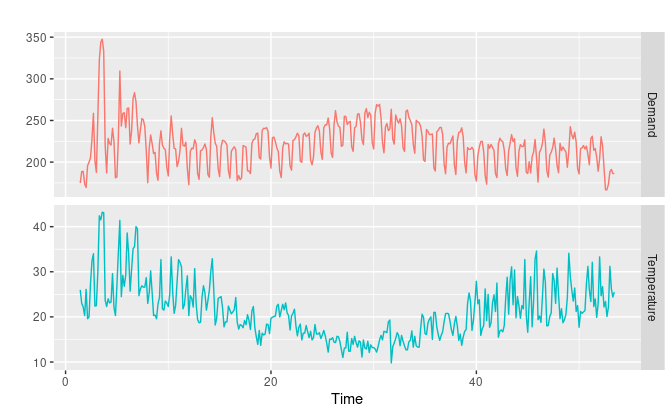

<br>

이 예제에서는 `auto.arima()` 함수를 이용하여 ARMA 오차를 고려하는 2차 회귀 모델을 맞춰보겠습니다.




	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,1,2)(2,0,0)[7] errors
Q* = 28.229, df = 8, p-value = 0.0004326

Model df: 6.   Total lags used: 14



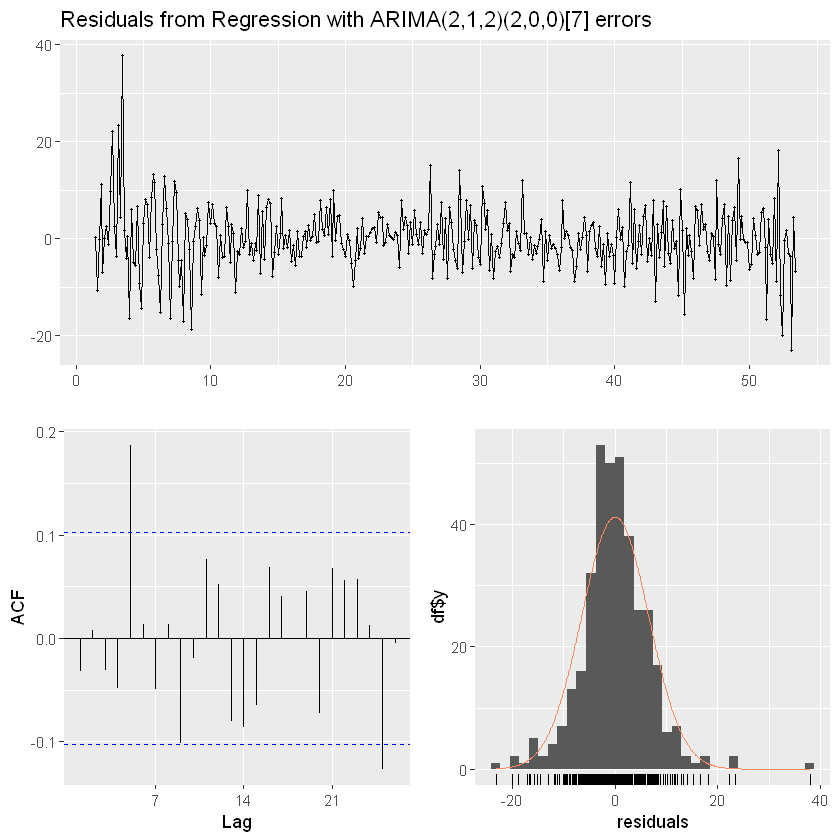

In [11]:
xreg <- cbind(MaxTemp = elecdaily[, "Temperature"],
              MaxTempSq = elecdaily[, "Temperature"]^2,
              Workday = elecdaily[, "WorkDay"])

fit <- auto.arima(elecdaily[, "Demand"], xreg = xreg)

checkresiduals(fit)

이 모델의 잔차에 몇 가지 주목할 만한 자기 상관이 있습니다. 이 말은 예측구간(prediction interval)이 정확한 범위를 나타내지 않을 수도 있다는 것을 의미합니다. 게다가, 잔차의 히스토그램(histogram)에서 양(+)의 값을 갖는 이상값이 하나 보입니다. 이것도 예측구간의 범위에 영향을 줄 수 있습니다.

추정한 모델을 이용하여 2015년 1월 1일 목요일부터 14일 앞을 예측합니다 (새해 첫 날은 공휴일이라 비업무일입니다). 이 경우에, 다음 14일에 대한 기상청 데이터로부터 날씨 예측값을 얻을 수 있습니다. 하지만 설명을 위해, (5.6 절에서 소개한) 시나리오 기반 예측을 사용할 것입니다. 여기에서 다음 14일 기온을 일정하게 섭씨 26도로 둡니다.



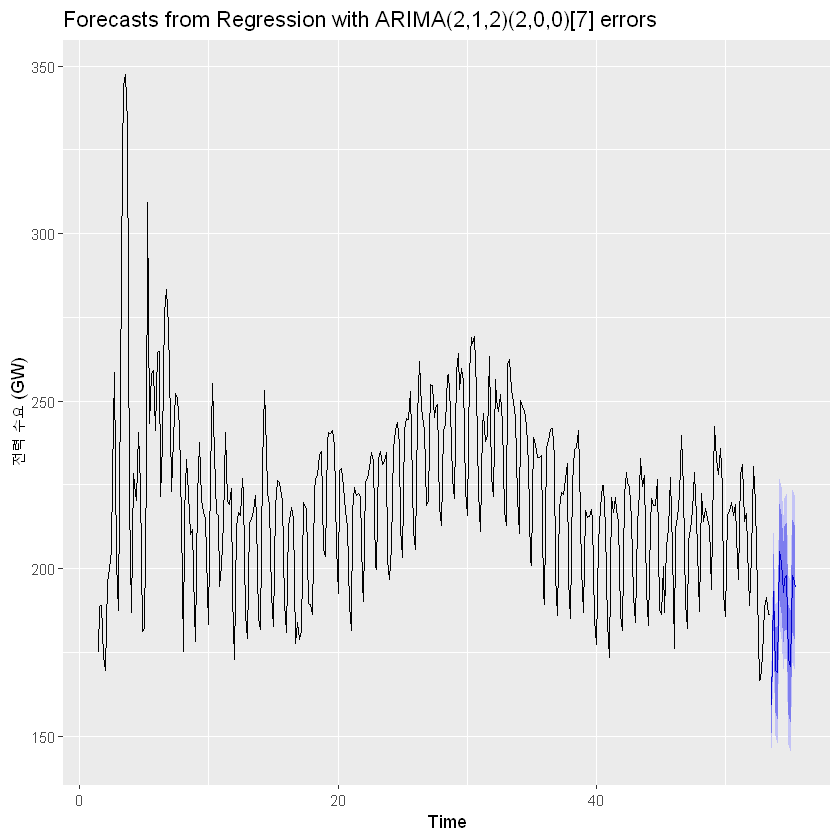

In [12]:
fcast <- forecast(fit,
                  xreg = cbind(MaxTemp=rep(26,14), MaxTempSq=rep(26^2,14),
                               Workday=c(0,1,0,0,1,1,1,1,1,0,0,1,1,1)))
autoplot(fcast) + ylab("전력 수요 (GW)")

2015년의 첫 2주에 대한 점 예측값이 그럴듯하게 보입니다. 2014년 말에 전력 수요 감소가(많은 사람이 여름 휴가를 떠나서. 옮긴이-호주는 남반구에 있어서 연말이 여름) 다음 2주에 대한 예측값에도 비슷하게 낮은 수요로 나타납니다.



<br>

## 09.04. 확률적 추세와 확정적 추세

선형 추세를 모델링하는 두 가지 다른 방법이 있습니다. **확정적 추세(deterministic trend)**는 다음과 같은 회귀 모델로 얻습니다.

$$y_t = \beta_0 + \beta_1 t + \eta_t,$$

**$\eta_t$는 ARMA 과정입니다.**

**확률적 추세(stochastic trend)**는 다음과 같은 모델로 얻습니다.

$$y_t = \beta_0 + \beta_1 t + \eta_t,$$

**여기에서  $η_t$는  $d=1$인 ARIMA 과정입니다. 이 경우에, $y_t' = \beta_1 + \eta_t'$가 되도록 양변을 뺍니다. 여기에서 $\eta_t'$ 는 ARMA 과정입니다. 다르게 말하면,**

$$y_t = y_{t-1} + \beta_1 + \eta_t'.$$

**이것은 표류(drift)가 있는 확률보행(random walk)과 비슷합니다만, 오차항은 단순한 백색잡음(white noise)이 아니라 ARMA 과정입니다.**

이러한 모델이 꽤 비슷한 것처럼 보이더라도$( 
η_t$
 에 차분을 계산해야하는 횟수에만 차이가 있습니다), 예측 특성은 꽤 다릅니다.

<br>

### 예측: 호주에 입국하는 국제선 방문객

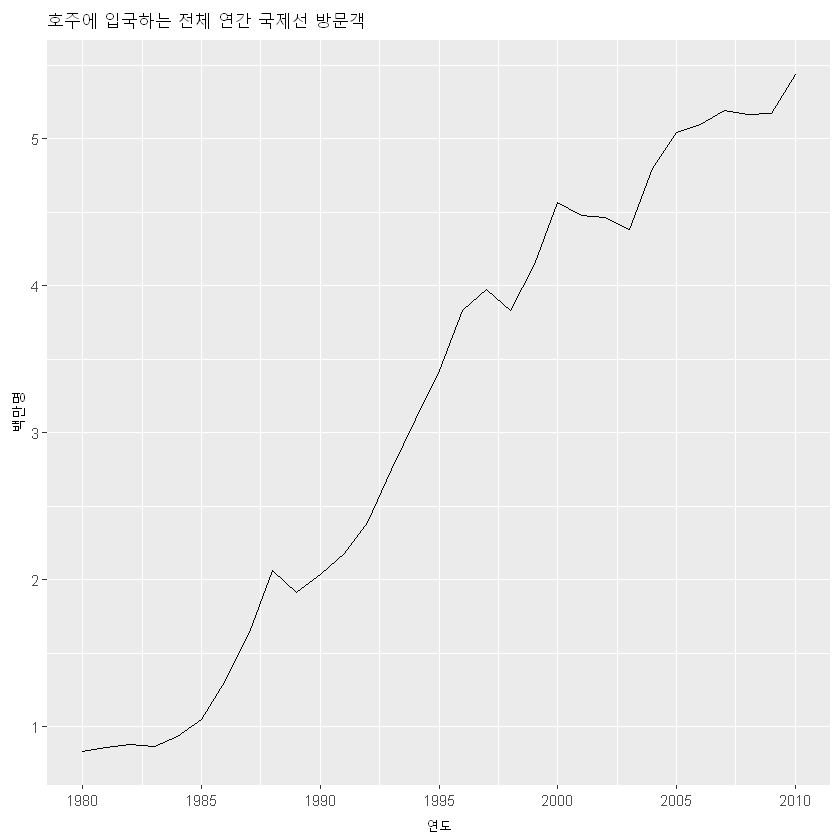

In [13]:
autoplot(austa) + xlab("연도") +
  ylab("백만명") +
  ggtitle("호주에 입국하는 전체 연간 국제선 방문객")

1980년부터 2015년까지 매년 호주에 입국하는 국제선 방문객의 전체 수를 나타냅니다. 이러한 데이터를 확정적 추세(deterministic trend) 모델과 확률적 추세(stochastic trend) 모델로 맞출 것입니다.

확정적 추세(deterministic trend) 모델은 다음과 같이 얻습니다.



In [14]:
trend <- seq_along(austa)

(fit1 <- auto.arima(austa, d=0, xreg=trend))

Series: austa 
Regression with ARIMA(1,0,1) errors 

Coefficients:
         ar1     ma1  intercept    xreg
      0.6409  0.4130     0.4495  0.1693
s.e.  0.1661  0.1905     0.2016  0.0108

sigma^2 = 0.0284:  log likelihood = 12.76
AIC=-15.53   AICc=-13.13   BIC=-8.36

이 모델은 다음과 같이 쓸 수 있습니다.

$$\begin{align*}
  y_t &= 0.4495 + 0.1693 t + \eta_t \\
  \eta_t &= 0.6409 \eta_{t-1} 0.4130 \eta_{t-2} + \varepsilon_t\\
  \varepsilon_t &\sim \text{NID}(0,0.0284).
\end{align*}$$

추정된 방문하는 사람 수의 증가량은 연간 0.17 백만명입니다.

<br>

한편, 확률적 추세(stochastic trend) 모델을 다음과 같이 추정할 수 있습니다.

In [15]:
(fit2 <- auto.arima(austa, d=1))

Series: austa 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.1537
s.e.  0.0323

sigma^2 = 0.03241:  log likelihood = 9.38
AIC=-14.76   AICc=-14.32   BIC=-11.96

<br>

이 모델은 $y_t-y_{t-1} = 0.173 + \eta'_t$로 쓸 수 있거나 아래와 같이도 쓸 수 있습니다.

$$\begin{align*}
  y_t &= y_0 + 0.1537 t + \eta_t \\
  \eta_t &= \eta_{t-1}+ \varepsilon_{t}\\
  \varepsilon_t &\sim \text{NID}(0,0.03241).
\end{align*}$$

이 경우에, 추정된 방문하는 사람 수의 증가량은 연간 0.17 백만명입니다. 증가량 추정값이 비슷하더라도 아래 그림에서 나타나는 것처럼 예측구간은 다르게 나타납니다. 특히, 확률적 추세(stochastic trend)는 오차에 정상성이 나타나지 않기 때문에 예측구간이 훨씬 넓습니다.

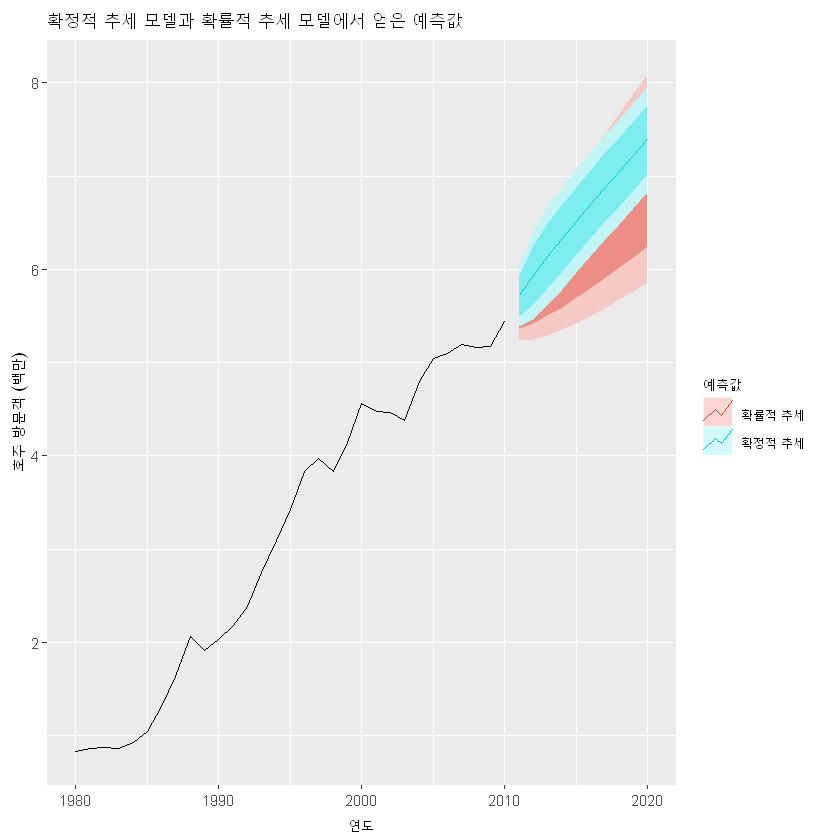

In [16]:
fc1 <- forecast(fit1,
  xreg = length(austa) + 1:10)

fc2 <- forecast(fit2, h=10)
autoplot(austa) +
  autolayer(fc2, series="확률적 추세") +
  autolayer(fc1, series="확정적 추세") +
  ggtitle("확정적 추세 모델과 확률적 추세 모델에서 얻은 예측값") +
  xlab("연도") + ylab("호주 방문객 (백만)") +
  guides(colour=guide_legend(title="예측값"))

**확정적 추세(deterministic trend)에는 추세의 기울기가 시간에 따라서 변하지 않을 것이라는 가정이 들어가 있습니다.**

**반면에, 확률적인 추세(stochastic trend)는 변할 수 있고 추정된 증가량에는 과거 기간 동안 평균 증가만 가정하고, 미래에 나타날 성장률일 필요는 없습니다.**

**결과적으로, 예측구간이 미래 성장에 있어서 더 큰 불확실성을 허용하기 때문에 확률적 추세(stochastic trend)로 예측하는 것이 더 안전하고, 특별히 예측수평선(forecast horizon)이 좀 더 길 때는 더더욱 그렇습니다.**



<br>

## 09.05. 동적 조화 회귀

**긴 계절성 주기가 있을 때, 푸리에 항을 고려한 동적회귀(dynamic regression)가 종종 이 책에서 지금까지 다룬 다른 모델보다 더 좋습니다.**

예를 들면, 일별 데이터에는 365 길이의 연도 계절성이 있을 수 있고, 주별 데이터는 근사적으로 52 주기의 계절성이 있을 수 있고, 30분 단위 데이터는 몇몇 계절성 주기를 가질 수 있고 그 중에서 가장 짧은 것은 주기 48의 일별 패턴입니다.

**ARIMA와 ETS 모델의 계절성 형태는 월별 데이터에서 12나 분기별 데이터의 4와 같은 더 짧은 주기를 위해 설계되었습니다.** 

**`ets()` 함수는 계절성이 최대 24 주기값을 갖도록 제한이 있고 더 큰 계절성 주기의 데이터는 안 됩니다.** 문제는  $m$ 이 계절성 주기일 때, 추정할 초기 계절성 상태에 대한  $m−1$ 매개변수가 있다는 것입니다. 따라서  $m$ 이 클 때 추정하는 것이 거의 불가능하게 됩니다.

**`Arima()`와 `auto.arima()` 함수에는 $m=350$까지 계절성 주기를 넣을 수 있습니다만, 실제로는 계절성 주기를 약 200 이상으로 잡을 때 보통은 메모리 오류가 생길 것입니다.** 어쨌든, 높은 차수의 계절성 차분은 그렇게 의미 있진 않습니다 — 일별 데이터에서는 오늘 일어난 것과 정확히 1년 전에 일어난 일을 비교하는 일이 들어가고 계절성 패턴이 매끄럽다는 제한조건이 없습니다.

**따라서 이러한 시계열에서는 ARMA 오차로 다루는 단기 시계열 동역학을 고려하는 푸리에 항을 이용하는 조화회귀(harmonic regression) 접근 방식이 낫습니다.**

이러한 접근 방식의 장점은 다음과 같습니다:

* **어떠한 길이의 계절성도 가능합니다;**
* **2 이상의 계절성 주기를 가지는 데이터에서, 다른 주기의 푸리에 항을 넣을 수 있습니다.**
* **계절성 패턴의 매끄러운 정도(평활도; smoothness)는 푸리에 사인과 코사인 쌍의 개수인  $K$로 조절할 수 있습니다. 계절성 패턴은 $K$가 작을수록 더 매끄럽습니다;**
* **단기 동역학을 단순한 ARMA 오차로 쉽게 다룹니다.**

유일한 실제적인 단점은(계절성 ARIMA 모델과 비교할 때) 계절성이 고정되어있다고 가정하는 것입니다 — 계절성 패턴이 시간에 따라 변하지 않는다고 두는 것. 하지만 실제 상황에서 계절성은 보통 상수이고 따라서 긴 시계열을 제외하고는 이러한 단점이 그렇게 큰 문제가 되지 않습니다.

<br>

### 예제: 호주 외식비 지출

이 예제에서는 계절성을 잡아내는 푸리에 항과 데이터의 다른 동역학을 잡아내는 ARIMA 오차를 결합하는 것을 설명하겠습니다. 간결함을 위해, 월별 데이터 예제를 사용하겠습니다. (주별 데이터를 이용한 같은 모델링 방식을 12.1 절에서 다뤘습니다.)

`auscafe`라는 데이터에는 호주의 카페, 식당, 테이크아웃 전문점 등의 월별 지출(단위: 10억 달러)이 2004년부터 2016년 11월까지 있습니다. 

이 데이터를 사용해서 24개월 앞을 예측하겠습니다. 푸리에 사인과 코사인 쌍의 개수인  $K$를 $ 
K
=
1$ 부터  $K
=
6$ 까지 바꿔보겠습니다(계절성 가변수(dummy variables)를 넣는 것과 같습니다). 

그림은 $K$에 따라 예측된 계절성 패턴을 나타냅니다.  $K$가 증가함에 따라, 푸리에 항이 더 “꾸불꾸불한” 계절성 패턴을 더 잘 잡아내고, 다른 동역학을 잡아내려면 더 단순한 ARIMA 모델이 필요합니다. AICc 값은  $K
=
4$ 에서 $ 
K
=
5$
 로 갈 때 급격하게 뛰면서 $ 
K
=
5
$ 에서 최소가 됩니다. 따라서 이 모델에서 얻은 예측값이 사용될 수도 있겠습니다.

<br>

* 푸리에 항과 ARIMA 오차를 이용한 호주 월별 외식 지출 예측.

In [17]:
cafe04 <- window(auscafe, start=2004)

In [18]:
plots <- list()

for (i in seq(6)) {
  fit <- auto.arima(cafe04, xreg = fourier(cafe04, K = i),
    seasonal = FALSE, lambda = 0)
  plots[[i]] <- autoplot(forecast(fit,
      xreg=fourier(cafe04, K=i, h=24))) +
    xlab(paste("K=",i,"   AICC=",round(fit[["aicc"]],2))) +
    ylab("") + ylim(1.5,4.7)
}

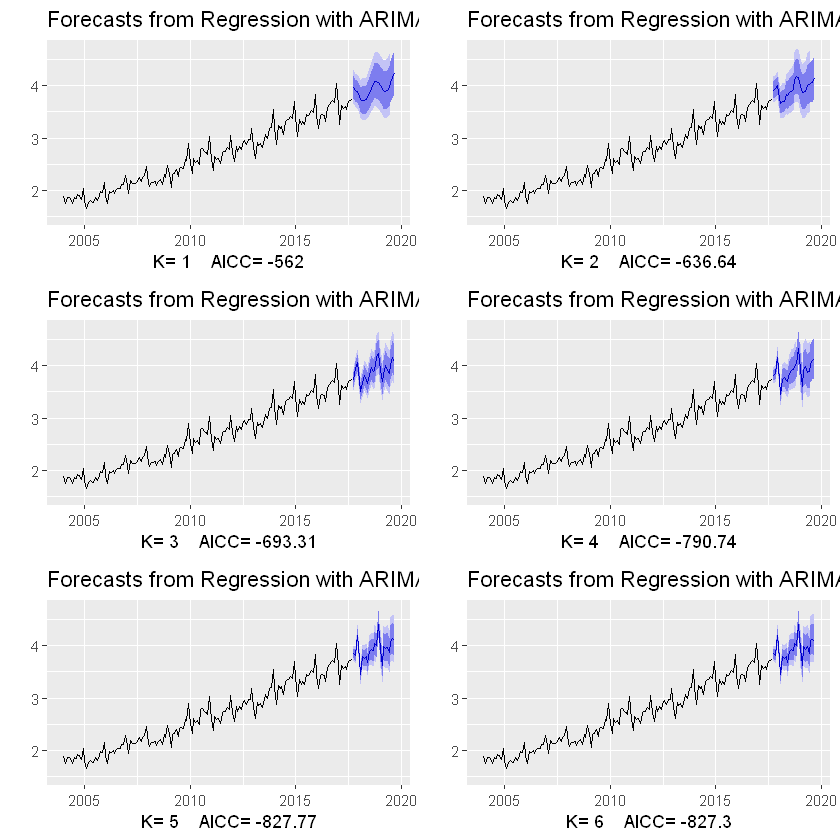

In [19]:
gridExtra::grid.arrange(
  plots[[1]],plots[[2]],plots[[3]],
  plots[[4]],plots[[5]],plots[[6]], nrow=3)

<br>

## 09.06. 시차 예측변수

**때때로, 회귀 모델에 들어가는 예측변수(predictor variable)의 영향이 단순하거나 즉각적이지 않을 것입니다. 예를 들면, 광고 캠페인이 캠페인이 끝난 이후에도 영향을 미칠 수도 있고, 한 달 동안의 판매량은 이전 몇 달 각각의 광고 지출에 의존할 것입니다. 비슷하게, 회사의 안전 정책의 변화는 사고를 바로 줄일 수도 있겠지만, 근로자가 새로운 작업 환경에 적응하면서 덜 신경쓰게 되고 시간에 따른 효과가 줄어듭니다.**

**이러한 상황에서, 예측변수(predictor variable)의 시차(lag) 효과를 넣을 필요가 있습니다. 모델에서 하나의 예측변수(predictor variable)만 있는 상황을 생각해봅시다. 그러면 시차 효과를 허용하는 모델은 다음과 같이 쓸 수 있습니다.**

$$y_t = \beta_0 + \gamma_0x_t + \gamma_1 x_{t-1} + \dots + \gamma_k x_{t-k} + \eta_t,$$

여기에서  $η_t$은 ARIMA 과정입니다. $k$ 값은 AICc를 이용하여 ARIMA 오차에 대한  $
p$
 와$  
q$
  값에 따라 고를 수 있습니다.
  
<br>

### 예제: TV 광고와 보험 견적

어떤 미국 보험 회사는 제공하는 보험 견적 수(결과적으로 새로운 정책의 수)를 늘리기 위해 전국 방송에 광고합니다. 그림은 2002년 1월부터 2005년 4월까지 그 회사의 매월 TV 광고 지출과 견적의 수를 나타냅니다.

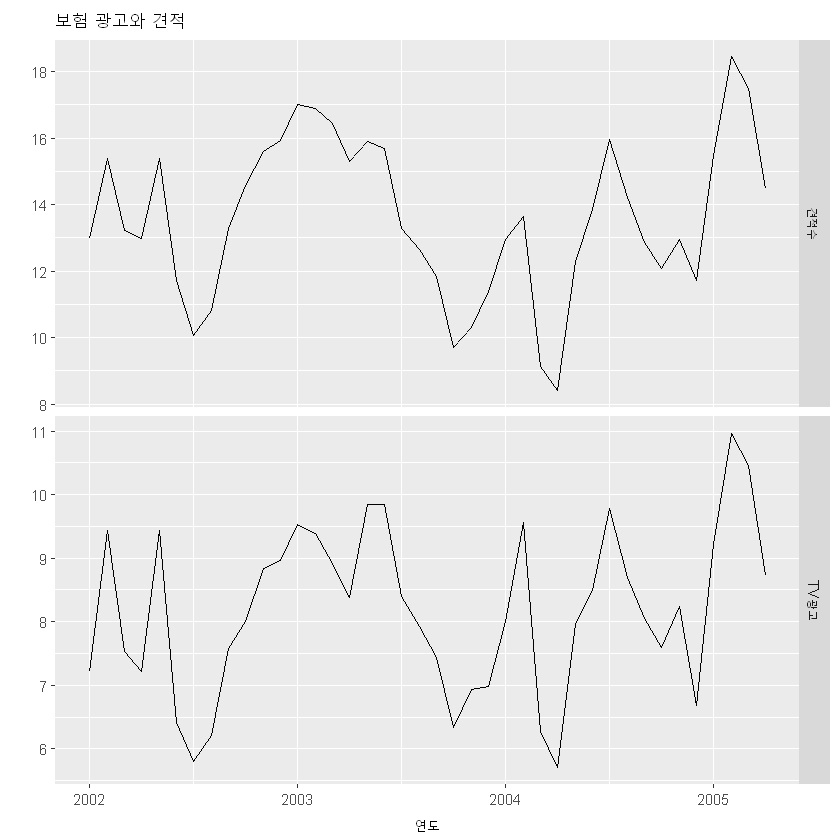

In [21]:
colnames(insurance) <- c("견적수","TV광고")
autoplot(insurance, facets=TRUE) +
  xlab("연도") + ylab("") +
  ggtitle("보험 광고와 견적")

colnames(insurance) <- c("Quotes","TV.advert")

최대 4개월까지의 광고 비용을 포함하여 다룰 것입니다. **즉, 이 모델에는 현재 월의 광고 비용과 3개월 전의 광고비가 들어갈 수 있습니다.** 모델을 비교할 때, 모두 같은 테스트 데이터를 사용하는 것이 중요합니다. 다음의 코드에서는 공정한 비교를 위해, 첫 3개월 값을 제외합니다.

In [22]:
Advert <- cbind(
    AdLag0 = insurance[,"TV.advert"],
    AdLag1 = stats::lag(insurance[,"TV.advert"],-1),
    AdLag2 = stats::lag(insurance[,"TV.advert"],-2),
    AdLag3 = stats::lag(insurance[,"TV.advert"],-3)) %>%
  head(NROW(insurance))

In [23]:
fit1 <- auto.arima(insurance[4:40,1], xreg=Advert[4:40,1],
  stationary=TRUE)

fit2 <- auto.arima(insurance[4:40,1], xreg=Advert[4:40,1:2],
  stationary=TRUE)

fit3 <- auto.arima(insurance[4:40,1], xreg=Advert[4:40,1:3],
  stationary=TRUE)

fit4 <- auto.arima(insurance[4:40,1], xreg=Advert[4:40,1:4],
  stationary=TRUE)

다음은 AICc에 기초하여 광고 예제 경우의 최적 시차 길이를 선택합니다.



In [24]:
c(fit1[["aicc"]],fit2[["aicc"]],fit3[["aicc"]],fit4[["aicc"]])

[1] 68.49968 60.02357 62.83253 65.45747

(AICc 값이 가장 작은) 가장 좋은 모델에는 2개의 시차 예측변수(lagged predictor variable)가 있습니다. 즉, 현재 달과 이전 달의 광고만 포함합니다. 따라서 이제 모든 가능한 데이터를 이용하여 다시 계산하겠습니다.



In [25]:
(fit <- auto.arima(insurance[,1], xreg=Advert[,1:2],
  stationary=TRUE))

Series: insurance[, 1] 
Regression with ARIMA(3,0,0) errors 

Coefficients:
         ar1      ar2     ar3  intercept  AdLag0  AdLag1
      1.4117  -0.9317  0.3591     2.0393  1.2564  0.1625
s.e.  0.1698   0.2545  0.1592     0.9931  0.0667  0.0591

sigma^2 = 0.2165:  log likelihood = -23.89
AIC=61.78   AICc=65.4   BIC=73.43

선택된 모델에는 AR(3) 오차가 있습니다. 이 모델은 다음과 같이 쓸 수 있습니다.

$$y_t = 2.039 +
         1.256 x_t +
         0.162 x_{t-1} + \eta_t,$$
         
여기에서  $y_t$는 $
t$
 월에 제공한 보험 견적의 수이고, $ 
x_
t$
 는$  
t$
 월의 광고 지출이고,
 
$$\eta_t = 1.412 \eta_{t-1}
        -0.932 \eta_{t-2} +
        0.359 \eta_{t-3} + \varepsilon_t,$$
        
이며,  $
ε_t$
 는 백색잡음(white noise)입니다.
 
광고 변수의 미래 값을 가정하면, 이 모델을 가지고 예측값을 계산할 수 있습니다. 미래 월별 광고를 8 단위로 정하면, 그림에 나타낸 것과 같은 예측값을 얻습니다.

In [26]:
fc8 <- forecast(fit, h=20,
  xreg=cbind(AdLag0=rep(8,20), AdLag1=c(Advert[40,1],rep(8,19))))

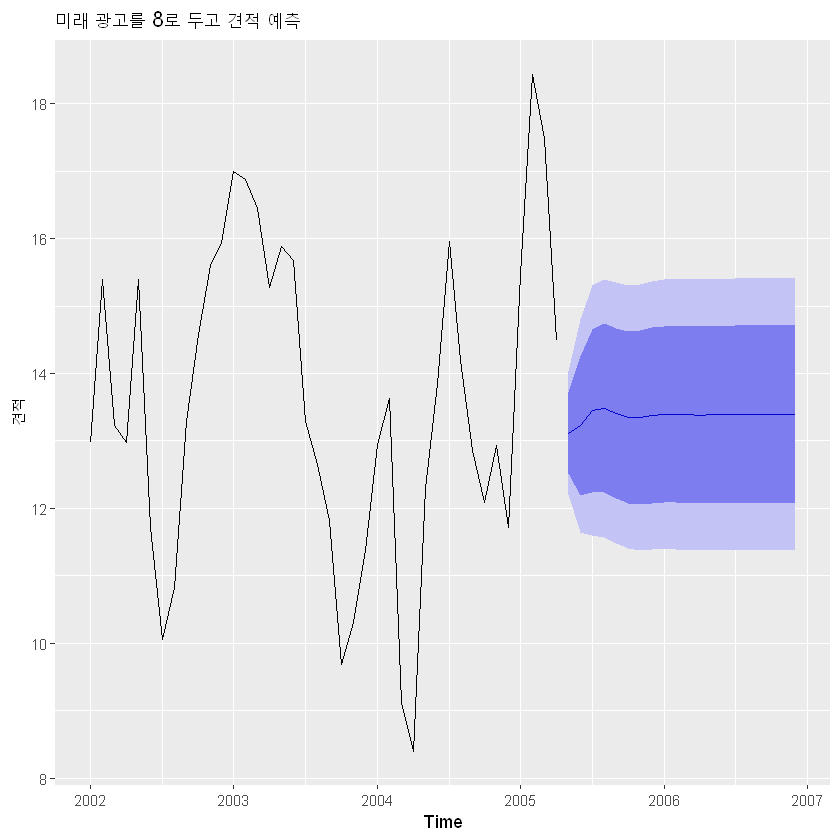

In [27]:
autoplot(fc8) + ylab("견적") +
  ggtitle("미래 광고를 8로 두고 견적 예측")